# Setup

In [1]:
!pip install timm
import timm 
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 36.1 MB/s 


In [2]:
! pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 27.7 MB/s 
     |████████████████████████████████| 365 kB 67.4 MB/s 
     |████████████████████████████████| 1.3 MB 52.5 MB/s 
     |████████████████████████████████| 4.9 MB 21.3 MB/s 
     |████████████████████████████████| 115 kB 73.1 MB/s 
     |████████████████████████████████| 212 kB 56.0 MB/s 
     |████████████████████████████████| 120 kB 67.2 MB/s 
     |████████████████████████████████| 127 kB 74.7 MB/s 
     |████████████████████████████████| 6.6 MB 63.2 MB/s 


In [3]:
# to use kaggle api #
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# kaggle API creds #
creds = '{"username":"victorbahlangene","key":"2cd1abe2f1c35ea3060e6a2f18a055ea"}'

In [5]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [6]:
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -q fastkaggle

from fastkaggle import *

In [7]:
# competion name #
comp = 'sign-language-image-classification'

# path to where data will be downloaded #
path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')

from fastai.vision.all import *
set_seed(42)

100%|██████████| 214M/214M [00:08<00:00, 27.0MB/s]


# Data analysis

In [8]:
path

Path('sign-language-image-classification')

In [9]:
path.ls()

(#4) [Path('sign-language-image-classification/train.csv'),Path('sign-language-image-classification/submit.csv'),Path('sign-language-image-classification/test.csv'),Path('sign-language-image-classification/images')]

**Train csv**

In [10]:
trn_df = pd.read_csv(path/"train.csv")

In [11]:
trn_df

,id,label
0,b1627fb5d6af156b41c46704bc041416.jpg,8
1,bf61d61ec5f282372b76311e2594b94f.jpg,13
2,1e963951fb29f4f37d9a153e14533d80.jpg,17
3,4aec4a36181bd02af6040e3b4eef8378.jpg,14
4,78740bc6ad7b6ca6fe572a580ffa65e0.jpg,16
...,...,...
1995,ab98e8288691368429373c8ce97464bb.jpg,17
1996,8554d163909096427e3197bdfe95ab5c.jpg,7
1997,9c86ecf81893b65ee9ac478f1351ca8c.jpg,14
1998,36398d5613e8b7e5515b37d10f7b8bd9.jpg,19


**Test csv**

In [12]:
tst_df = pd.read_csv(path/"test.csv")
tst_df

,id
0,5f3540c43f86dab2c9a7c87834311ee3.jpg
1,7f14db51f1994bce42972c7fe111f5cd.jpg
2,092908960a3d4dccbe06a60b71dcdd98.jpg
3,542ed4f107f9472457b47a436ec55e60.jpg
4,c125af0d467cffe584728aad4b426d53.jpg
...,...
1499,480bd34d7aaddb2f15d897f6fa938a1a.jpg
1500,610ecbaf1f77fcbd8dda0f664c084769.jpg
1501,f9e8adc8f33ef85d7ece4220537e9fec.jpg
1502,826744d31261d3fd854b7bf93f2952c5.jpg


**Submission data format**

In [102]:
ss = pd.read_csv(path/"submit.csv")
ss

,id,predict
0,5f3540c43f86dab2c9a7c87834311ee3.jpg,NaN
1,7f14db51f1994bce42972c7fe111f5cd.jpg,NaN
2,092908960a3d4dccbe06a60b71dcdd98.jpg,NaN
3,542ed4f107f9472457b47a436ec55e60.jpg,NaN
4,c125af0d467cffe584728aad4b426d53.jpg,NaN
...,...,...
1499,480bd34d7aaddb2f15d897f6fa938a1a.jpg,NaN
1500,610ecbaf1f77fcbd8dda0f664c084769.jpg,NaN
1501,f9e8adc8f33ef85d7ece4220537e9fec.jpg,NaN
1502,826744d31261d3fd854b7bf93f2952c5.jpg,NaN


**train images**

In [18]:
trn_path = path/"images/images/train"
trn_files = get_image_files(trn_path)
trn_files

(#2000) [Path('sign-language-image-classification/images/images/train/cffbfaa8026e59785259fd6cf71dfd58.jpg'),Path('sign-language-image-classification/images/images/train/cfe558f2c38c4b3835e33b07fb656a50.jpg'),Path('sign-language-image-classification/images/images/train/722c75751ecff151ece740144aac666e.jpg'),Path('sign-language-image-classification/images/images/train/4d57ff612e5f35cb5beb7d3829605122.jpg'),Path('sign-language-image-classification/images/images/train/0f205a018d1bf382228783cfa8579ff3.jpg'),Path('sign-language-image-classification/images/images/train/7c6d4a7c1d3ba68f688c78540456dee4.jpg'),Path('sign-language-image-classification/images/images/train/4670bf85c30dfd38dd59d126017fe8fd.jpg'),Path('sign-language-image-classification/images/images/train/02a7aefd4d446a9c8d588a79091eeffc.jpg'),Path('sign-language-image-classification/images/images/train/c694539ca7f6f43b14b44eb10e0584f5.jpg'),Path('sign-language-image-classification/images/images/train/34eb11352da5b26149edb9376d5973

(741, 813)


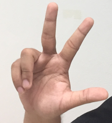

In [19]:
img = PILImage.create(trn_files[0])
print(img.size)

img.to_thumb(123)

## Train function

**datablock and dataloaders**

In [20]:
def get_x(r): return path/"images/images/train"/r["id"]
def get_y(r): return r["label"]

```python
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(480, method='squish'),
                   batch_tfms=aug_transforms(size=128, min_scale=0.75))

dls = dblock.dataloaders(trn_df)
```

**Train function**

In [31]:
def train(arch, item, batch, trn_df, epochs=5):
  def get_x(r): return path/"images/images/train"/r["id"]
  def get_y(r): return r["label"]
  dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=item,
                   batch_tfms=batch).dataloaders(trn_df)
  learn = vision_learner(dls, arch, metrics=accuracy).to_fp16()
  learn.fine_tune(epochs, 0.001)
  return learn

test


In [32]:
learn = train(arch = 'resnet26d', item=Resize(480),
              batch=aug_transforms(size=128, min_scale=0.75),
              trn_df=trn_df, epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,3.069561,1.027833,0.662500,00:25


epoch,train_loss,valid_loss,accuracy,time
0,1.371553,0.692997,0.770000,00:22
1,1.090619,0.509787,0.840000,00:22
2,0.936081,0.486500,0.857500,00:22


# new model: ` ConvNeXt model`

In [33]:
arch = 'convnext_small_in22k'

In [34]:
learn = train(arch, item=Resize(480),
              batch=aug_transforms(size=128, min_scale=0.75),
              trn_df=trn_df)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_22k_224.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.549058,1.624778,0.487500,00:23


epoch,train_loss,valid_loss,accuracy,time
0,2.081146,1.220489,0.640000,00:26
1,1.726460,0.735030,0.770000,00:25
2,1.386207,0.521489,0.832500,00:25
3,1.124232,0.439684,0.865000,00:24
4,0.967919,0.430489,0.867500,00:24


# Preprocessing experiments

## crop

```python
learn = train(arch, item=Resize(480),
              batch=aug_transforms(size=128, min_scale=0.75),
              trn_df=trn_df)
```

By default fastai crops 

## Squish

In [35]:
learn = train(arch, item=Resize(480, method="squish"),
              batch=aug_transforms(size=128, min_scale=0.75),
              trn_df=trn_df)

epoch,train_loss,valid_loss,accuracy,time
0,3.529737,1.826587,0.442500,00:26


epoch,train_loss,valid_loss,accuracy,time
0,2.045850,1.352373,0.580000,00:27
1,1.655862,0.761877,0.775000,00:26
2,1.293677,0.522106,0.852500,00:26
3,1.004253,0.448577,0.870000,00:26
4,0.846791,0.445248,0.862500,00:26


# Padding

show padding zeros

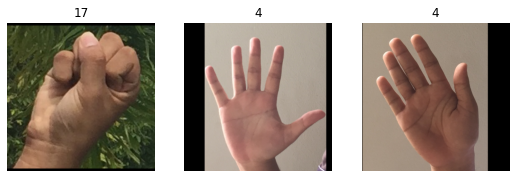

In [36]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(480, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros)).dataloaders(trn_df)
dls.show_batch(max_n=3)

**Learner padding**

In [37]:
learn = train(arch, item=Resize(480, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
              batch=aug_transforms(size=128, min_scale=0.75),
              trn_df=trn_df)

epoch,train_loss,valid_loss,accuracy,time
0,3.626732,1.680467,0.457500,00:30


epoch,train_loss,valid_loss,accuracy,time
0,2.188343,1.398221,0.565000,00:25
1,1.821120,0.835657,0.742500,00:26
2,1.446886,0.538521,0.835000,00:26
3,1.148121,0.458037,0.877500,00:26
4,0.958698,0.442475,0.875000,00:26


slightly better

# Test time Augmentation

**Accuracy without tta**

In [38]:
valid = learn.dls.valid
preds, targs = learn.get_preds(dl=valid)

In [39]:
accuracy(preds, targs)

TensorBase(0.8750)

same a before, as expected

**This is what augmentation does**

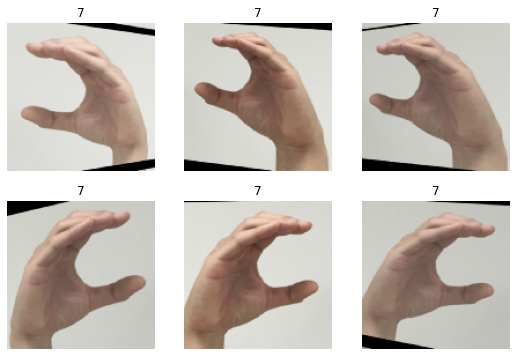

In [40]:
learn.dls.train.show_batch(max_n=6, unique=True)

**tta()** on validation set

In [42]:
# Learner.tta??

In [43]:
tta_preds,_ = learn.tta(dl=valid)

In [44]:
accuracy(tta_preds, targs)

TensorBase(0.9150)

`TTA` | Acc:0.875 -> 0.915

# Scaling up

epoches = 12

In [45]:
learn = train(arch, item=Resize(480, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
              batch=aug_transforms(size=128, min_scale=0.75),
              trn_df=trn_df, epochs=12)

epoch,train_loss,valid_loss,accuracy,time
0,3.622475,1.727693,0.422500,00:25


epoch,train_loss,valid_loss,accuracy,time
0,2.312848,1.507595,0.515000,00:26
1,2.028456,1.122176,0.677500,00:25
2,1.684351,0.713377,0.765000,00:26
3,1.342860,0.508483,0.835000,00:26
4,1.041549,0.346994,0.890000,00:26
5,0.799597,0.292256,0.900000,00:26
6,0.631141,0.231880,0.930000,00:26
7,0.512751,0.222379,0.930000,00:25
8,0.415084,0.197974,0.932500,00:25
9,0.351059,0.196635,0.947500,00:25


**TTA on validation set**

In [46]:
tta_preds_12e, targs = learn.tta(dl=learn.dls.valid)
accuracy(tta_preds_12e, targs)

TensorBase(0.9525)

In [77]:
tta_preds_12e.argmax(dim=1).unique()

TensorBase([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19])

# submit

In [47]:
get_image_files(path/"images/images/test")

(#1504) [Path('sign-language-image-classification/images/images/test/a5f726521c59335ec1916dbf9fc18bbe.jpg'),Path('sign-language-image-classification/images/images/test/51e584d4e9beee6cd393eef5ed76ce14.jpg'),Path('sign-language-image-classification/images/images/test/d5e256b436bf8f312a553387a793d432.jpg'),Path('sign-language-image-classification/images/images/test/96cb3100bf5c033246a2cbee447245b1.jpg'),Path('sign-language-image-classification/images/images/test/38df9bc7dc48c86f789bdc4d4e2391ac.jpg'),Path('sign-language-image-classification/images/images/test/9638c17e42a728262a72543b1bedd576.jpg'),Path('sign-language-image-classification/images/images/test/b2a866d71897c7625235ec1e7f767d47.jpg'),Path('sign-language-image-classification/images/images/test/0598c5bd6d54bb7d9e3b7ece979a118c.jpg'),Path('sign-language-image-classification/images/images/test/e62521709164e2eba0b73088f7ecf40c.jpg'),Path('sign-language-image-classification/images/images/test/348493e0cc360e236e5e748691527347.jpg')..

In [48]:
get_image_files(path/"images/images/test").sorted()

(#1504) [Path('sign-language-image-classification/images/images/test/003a97d7ca88c5fe85b7b2d812705f10.jpg'),Path('sign-language-image-classification/images/images/test/0050374d197dd3cf0c112ca1d871a12f.jpg'),Path('sign-language-image-classification/images/images/test/0072b156fd15cc20fe1ad4d33c54902c.jpg'),Path('sign-language-image-classification/images/images/test/0085e3a04af015b51b0c6ddf81638ee9.jpg'),Path('sign-language-image-classification/images/images/test/008ff2af62e264c4b04799faef6e2a8e.jpg'),Path('sign-language-image-classification/images/images/test/009cfd592acb43f9bdb5d18b81b2804c.jpg'),Path('sign-language-image-classification/images/images/test/00bdffc5fa8920a8009adfd47ab6851c.jpg'),Path('sign-language-image-classification/images/images/test/00d134dadbc2f1896873aba12801d604.jpg'),Path('sign-language-image-classification/images/images/test/00dc759fa72b37dab0ea5641ff90180b.jpg'),Path('sign-language-image-classification/images/images/test/00eb1ee095a182502c371f6031af1144.jpg')..

In [49]:
tst_files = get_image_files(path/"images/images/test").sorted()

In [78]:
tst_files

(#1504) [Path('sign-language-image-classification/images/images/test/003a97d7ca88c5fe85b7b2d812705f10.jpg'),Path('sign-language-image-classification/images/images/test/0050374d197dd3cf0c112ca1d871a12f.jpg'),Path('sign-language-image-classification/images/images/test/0072b156fd15cc20fe1ad4d33c54902c.jpg'),Path('sign-language-image-classification/images/images/test/0085e3a04af015b51b0c6ddf81638ee9.jpg'),Path('sign-language-image-classification/images/images/test/008ff2af62e264c4b04799faef6e2a8e.jpg'),Path('sign-language-image-classification/images/images/test/009cfd592acb43f9bdb5d18b81b2804c.jpg'),Path('sign-language-image-classification/images/images/test/00bdffc5fa8920a8009adfd47ab6851c.jpg'),Path('sign-language-image-classification/images/images/test/00d134dadbc2f1896873aba12801d604.jpg'),Path('sign-language-image-classification/images/images/test/00dc759fa72b37dab0ea5641ff90180b.jpg'),Path('sign-language-image-classification/images/images/test/00eb1ee095a182502c371f6031af1144.jpg')..

In [86]:
tst_dl = learn.dls.test_dl(tst_files)

In [87]:
x = tst_dl.one_batch()
x[0].shape

torch.Size([64, 3, 128, 128])

**TTA on test set**

In [88]:
preds_tta_test_set,_ = learn.tta(dl=tst_dl)

In [89]:
preds_tta_test_set.argmax(dim=1).shape

torch.Size([1504])

In [91]:
len(preds_tta_test_set.argmax(dim=1).unique())

20

**Sort the submission dataframe so it matches the test data**

In [103]:
ss

,id,predict
0,5f3540c43f86dab2c9a7c87834311ee3.jpg,NaN
1,7f14db51f1994bce42972c7fe111f5cd.jpg,NaN
2,092908960a3d4dccbe06a60b71dcdd98.jpg,NaN
3,542ed4f107f9472457b47a436ec55e60.jpg,NaN
4,c125af0d467cffe584728aad4b426d53.jpg,NaN
...,...,...
1499,480bd34d7aaddb2f15d897f6fa938a1a.jpg,NaN
1500,610ecbaf1f77fcbd8dda0f664c084769.jpg,NaN
1501,f9e8adc8f33ef85d7ece4220537e9fec.jpg,NaN
1502,826744d31261d3fd854b7bf93f2952c5.jpg,NaN


In [104]:
ss.sort_values("id", ascending=True, inplace=True)

In [105]:
ss

,id,predict
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,NaN
834,0050374d197dd3cf0c112ca1d871a12f.jpg,NaN
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,NaN
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,NaN
931,008ff2af62e264c4b04799faef6e2a8e.jpg,NaN
...,...,...
927,ff70c770641d8b6062a666ad07030762.jpg,NaN
157,ff8469ea510473a3c4ac271e82d15a87.jpg,NaN
41,ff8799c16f7ec6e704ee8f29d8dfdcb7.jpg,NaN
1032,ffa44bfbce1fdecd9302524a6cd9bb37.jpg,NaN


**to_csv**

In [92]:
preds_tta_test_set.argmax(dim=1)

TensorBase([15, 18,  2,  ...,  5,  5,  0])

In [93]:
idxs = preds_tta_test_set.argmax(dim=1)

In [94]:
idxs.shape, len(idxs.unique())

(torch.Size([1504]), 20)

In [95]:
vocab = np.array(learn.dls.vocab)
vocab

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [106]:
results = pd.Series(vocab[idxs], name="idxs")
results.head()

0    15
1    18
2     2
3     4
4     9
Name: idxs, dtype: int64

In [107]:
result_values = results.values

In [108]:
ss["predict"] = result_values

In [109]:
ss

,id,predict
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,15
834,0050374d197dd3cf0c112ca1d871a12f.jpg,18
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,2
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,4
931,008ff2af62e264c4b04799faef6e2a8e.jpg,9
...,...,...
927,ff70c770641d8b6062a666ad07030762.jpg,4
157,ff8469ea510473a3c4ac271e82d15a87.jpg,7
41,ff8799c16f7ec6e704ee8f29d8dfdcb7.jpg,5
1032,ffa44bfbce1fdecd9302524a6cd9bb37.jpg,5


In [110]:
ss.sort_index(inplace=True)

In [111]:
ss

,id,predict
0,5f3540c43f86dab2c9a7c87834311ee3.jpg,4
1,7f14db51f1994bce42972c7fe111f5cd.jpg,18
2,092908960a3d4dccbe06a60b71dcdd98.jpg,19
3,542ed4f107f9472457b47a436ec55e60.jpg,5
4,c125af0d467cffe584728aad4b426d53.jpg,1
...,...,...
1499,480bd34d7aaddb2f15d897f6fa938a1a.jpg,17
1500,610ecbaf1f77fcbd8dda0f664c084769.jpg,3
1501,f9e8adc8f33ef85d7ece4220537e9fec.jpg,9
1502,826744d31261d3fd854b7bf93f2952c5.jpg,11


In [114]:
ss.to_csv('submission2.csv', index=False)
!head submission2.csv

id,predict
5f3540c43f86dab2c9a7c87834311ee3.jpg,4
7f14db51f1994bce42972c7fe111f5cd.jpg,18
092908960a3d4dccbe06a60b71dcdd98.jpg,19
542ed4f107f9472457b47a436ec55e60.jpg,5
c125af0d467cffe584728aad4b426d53.jpg,1
dac637220376b2f834447c515148e301.jpg,6
c94daf6d789e53fd933cb26cedf00678.jpg,15
559cbbb343a27ec2839477c53b0ba65b.jpg,2
4a6bd7247218fe3cd2001a634b1fd6df.jpg,8


In [115]:

if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('submission2.csv', 'v5 test_dl_fix victor convnext small 128px', comp)

100%|██████████| 58.0k/58.0k [00:03<00:00, 15.8kB/s]


Score: **0.93085**

Public score: **0.94414**

POS: 25/41

**Submit Notebook to kaggle**

```python
push_notebook(user, id, title, file, path='.', competition=None, private=True, gpu=False, internet=True)
```

In [116]:
if not iskaggle:
  push_notebook('victorbahlangene', 'sign-language-image-classification',
                title='Sign Language Image Classification part 2',
                file='Sign_Language_Image_Classification_part_2.ipynb',
                path=".",
                competition=comp, private=False, gpu=False)

Your kernel title does not resolve to the specified id. This may result in surprising behavior. We suggest making your title something that resolves to the specified id. See https://en.wikipedia.org/wiki/Clean_URL#Slug for more information on how slugs are determined.
Kernel version 3 successfully pushed.  Please check progress at https://www.kaggle.com/victorbahlangene/sign-language-image-classification-part-2
